In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Map dependencies
from __future__ import print_function
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

satScore = pd.read_csv('SATscore2015.csv')

In [2]:
states = satScore['State'].values
mathScore = satScore['Mathematics'].values
writingScore = satScore['Writing'].values
totalScore = satScore['Total SAT score'].values

diccionarioMath = {k:x for k,x in zip(states,mathScore)}
diccionarioWriting = {k:x for k,x in zip(states,writingScore)}
diccionarioTotal = {k:x for k,x in zip(states, totalScore)}

In [17]:
def gen_plot_map(states_values_dict, title = ''):
    # Lambert Conformal map of lower 48 states.
    m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
                projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
    # draw state boundaries.
    # data from U.S Census Bureau
    # http://www.census.gov/geo/www/cob/st2000.html
    shp_info = m.readshapefile('st99_d00','states',drawbounds=True)
    # population density by state from
    # http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density

    # print(shp_info)
    # choose a color for each state based on population density.
    colors={}
    statenames=[]
    cmap = plt.cm.hot # use 'hot' colormap
    vmin = min(states_values_dict.values())
    vmax = max(states_values_dict.values())
    # vmin = 0;
    # vmax = 450 # set range.
    # print(m.states_info[0].keys())
    for shapedict in m.states_info:
        statename = shapedict['NAME']
        # skip DC and Puerto Rico.
        if statename not in ['District of Columbia','Puerto Rico']:
            pop = states_values_dict[statename]
            # calling colormap with value between 0 and 1 returns
            # rgba value.  Invert color range (hot colors are high
            # population), take sqrt root to spread out colors more.
            colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
        statenames.append(statename)

    # cycle through state names, color each one.
    ax = plt.gca() # get current axes instance
    for nshape,seg in enumerate(m.states):
        # skip DC and Puerto Rico.
        if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
            color = rgb2hex(colors[statenames[nshape]]) 
            poly = Polygon(seg,facecolor=color,edgecolor=color)
            ax.add_patch(poly)

    ax.set_title(title)
    # plt.colorbar(ax)

    plt.plot()

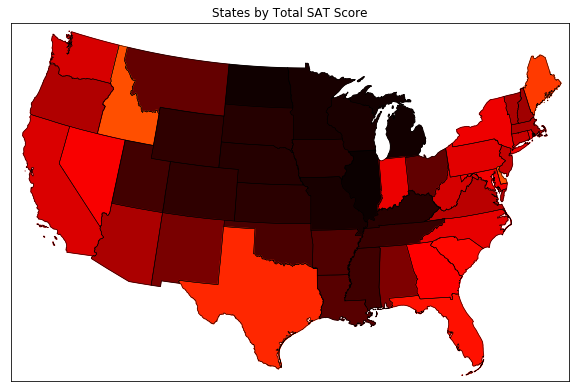

In [18]:
plt.figure(figsize=(10,10))

#plt.subplot(1,2,1)
#gen_plot_map(diccionarioWriting, 'States by Total Writing Score')

#plt.subplot(1,2,2)
gen_plot_map(diccionarioTotal, 'States by Total SAT Score')

plt.show()

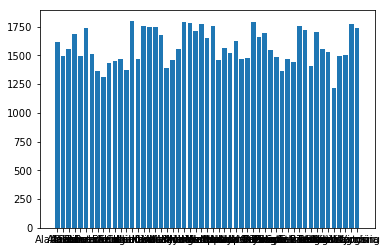

In [5]:

plt.bar(range(len(diccionarioTotal)), diccionarioTotal.values(), align='center')
plt.xticks(range(len(diccionarioTotal)), diccionarioTotal.keys())

plt.show()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 48 to 13
Data columns (total 4 columns):
State              53 non-null object
Mathematics        53 non-null object
Writing            53 non-null int64
Total SAT score    53 non-null int64
dtypes: int64(2), object(2)
memory usage: 2.1+ KB


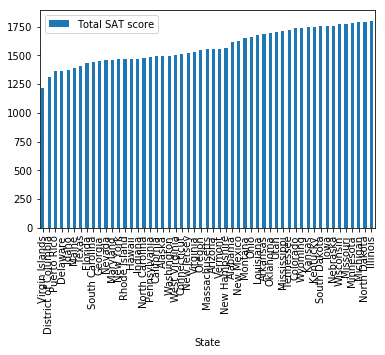

In [20]:
satScore.info()
satScore = satScore.sort_values('Total SAT score')
satScore.head()

satScore.plot.bar(x='State', y='Total SAT score')

In [25]:
satScore['Total SAT score'].values.mean()

1576.1886792452831